**Group 94:**
1. 2023aa05152 - Shruti S Kumar
2. 2023aa05072 - Peyala Samarasimha Reddy
3. 2023aa05195 - Viswanath Hemanth Chadalawada
4. 2023aa05930 - Sridhar K

Assignment Dataset - **Loan Sanction Dataset**

# **PART - 1**

# 1. Import Libraries/Dataset

#### **1.1 Download the dataset**

In [2]:
url='https://drive.google.com/file/d/1WDtHB5FALrnPBYgSKK1AfufQnhzspKtk/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

#### **1. 2. Import the required libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# 2. Data Visualization and Exploration

#### **2.a. Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.**

In [4]:
loan = pd.read_csv(url) # Extract dataset from the given URL
loan.head(2) # Display only first 2 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


Here Loan_Status would be the target variable.

**Extract basic information about the Loan Dataset**

In [5]:
# Get the number of rows and columns of the dataset
loan.shape

(614, 13)

In [6]:
loan.size

7982

In [7]:
loan.info() # Extract information on features that might have null values and data types of features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
# Retrieve Statistical information of the dataset
# Also, observe the 5-point summary of the dataset (minimum, Q1, median, Q3, maximum) along with mean and std dev
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
loan = loan.iloc[:,1:] # Selecting all rows and columns excluding Loan_ID
loan.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


#### **2.b. Comment on class imbalance with appropriate visualization method**

In [10]:
# Count of classes in categorical features to check for imbalance
for i in loan.columns: # Iterate over features of the dataset
  if loan[i].dtype == 'O': # If the feature is Categorical, continue
    print(i)
    print(loan[i].unique())
    print(Counter(loan[i]))

Gender
['Male' 'Female' nan]
Counter({'Male': 489, 'Female': 112, nan: 13})
Married
['No' 'Yes' nan]
Counter({'Yes': 398, 'No': 213, nan: 3})
Dependents
['0' '1' '2' '3+' nan]
Counter({'0': 345, '1': 102, '2': 101, '3+': 51, nan: 15})
Education
['Graduate' 'Not Graduate']
Counter({'Graduate': 480, 'Not Graduate': 134})
Self_Employed
['No' 'Yes' nan]
Counter({'No': 500, 'Yes': 82, nan: 32})
Property_Area
['Urban' 'Rural' 'Semiurban']
Counter({'Semiurban': 233, 'Urban': 202, 'Rural': 179})
Loan_Status
['Y' 'N']
Counter({'Y': 422, 'N': 192})


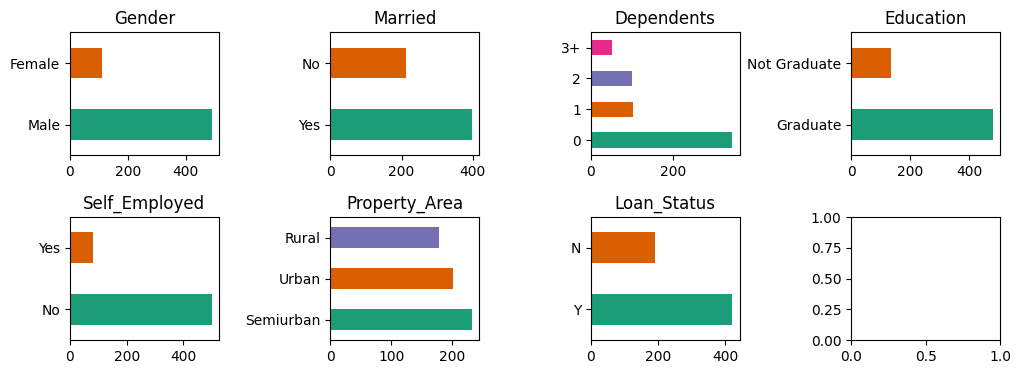

In [11]:
# Plots for 7 categorical features
fig,axes = plt.subplots(nrows=2, ncols=4, figsize=(12,4))
for col, ax in zip(loan.select_dtypes(include='O'), axes.ravel()):
  ax.set_title(col)
  loan[col].value_counts().plot.barh(ax=ax,color=sns.palettes.mpl_palette('Dark2'))
plt.subplots_adjust(wspace=0.75, hspace=0.5)
plt.show()

From the above visualizations we can see that features like Gender, Married, Dependents, Education, Self_Employed and Loan_Status have imbalance in their classes.

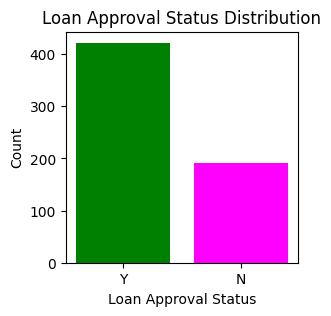

In [12]:
# Class imbalance in the Target variable
loan_status_counts = loan['Loan_Status'].value_counts()
plt.figure(figsize=(3,3))
plt.bar(loan_status_counts.index, loan_status_counts.values, color=['green', 'magenta'])
plt.xlabel('Loan Approval Status')
plt.ylabel('Count')
plt.title('Loan Approval Status Distribution')
plt.show()

In [13]:
# Find % of both outcomes of Loan Status
total_loans = loan_status_counts.sum()
approval_percentage = (loan_status_counts['Y'] / total_loans) * 100
rejection_percentage = (loan_status_counts['N'] / total_loans) * 100

print("Number of Approved Loans:",loan_status_counts['Y'])
print("Number of Rejected Loans:",loan_status_counts['N'])
print(f"Loan approval percentage: {approval_percentage:.2f}%")
print(f"Loan rejection percentage: {rejection_percentage:.2f}%")

Number of Approved Loans: 422
Number of Rejected Loans: 192
Loan approval percentage: 68.73%
Loan rejection percentage: 31.27%


The imbalance above is identified by the counts of target class. We have:

Approved loans('Y') for 422 samples - Majority Class, and

Rejected loans ('N') for 192 samples - Minority Class

Hence, we have more number of Approved Loans than Rejected Loans. This induces dfficulty in gaining more insights on the Minority Class and accurately classify the samples without biases. Training the model with imbalanced data might be biased towards the Majority Class (Approved).






#### **2.c. Provide appropriate data visualizations to get an insight about the dataset**

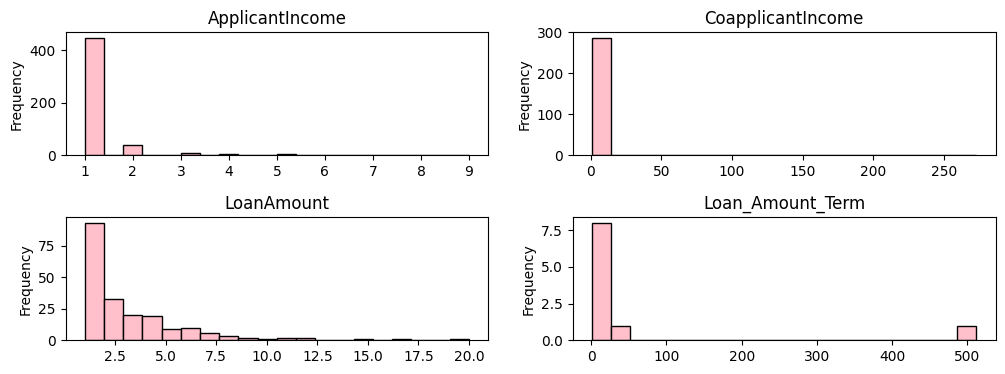

In [14]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(12,4))
temp = loan.iloc[:,5:9] # Considered 4 features to plot Histogram
for col, ax in zip(temp, axes.ravel()):
  ax.set_title(col)
  temp[col].value_counts().plot.hist(ax=ax, bins=20, color = "pink", ec="black") #plot a histogram for selected features
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

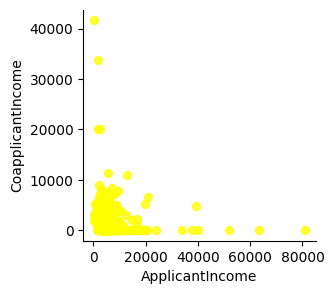

In [15]:
# Relationship between Applicant and Co-Applicant Income
loan.plot(kind='scatter', x='ApplicantIncome', y='CoapplicantIncome', s=32, alpha=.8, color='yellow', figsize=(3,3))
plt.gca().spines[['top', 'right',]].set_visible(False)

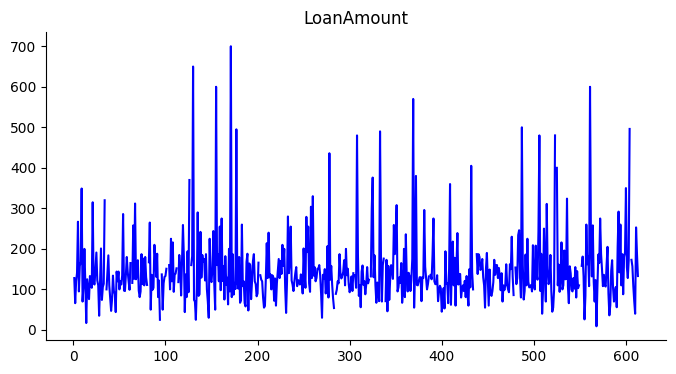

In [16]:
# Line distribution of Loan Amount
loan['LoanAmount'].plot(kind='line', figsize=(8, 4), color='blue', title='LoanAmount')
plt.gca().spines[['top', 'right']].set_visible(False)

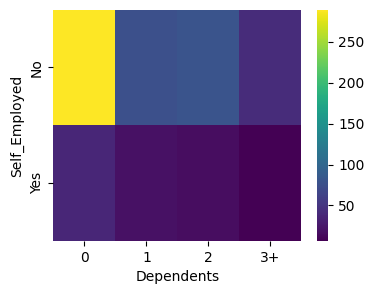

In [17]:
# Plot a HeatMap of Gender vs Self_Employed
plt.subplots(figsize=(4, 3))
df_2dhist = pd.DataFrame({
    x_label: grp['Self_Employed'].value_counts()
    for x_label, grp in loan.groupby('Dependents')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Dependents')
_ = plt.ylabel('Self_Employed')

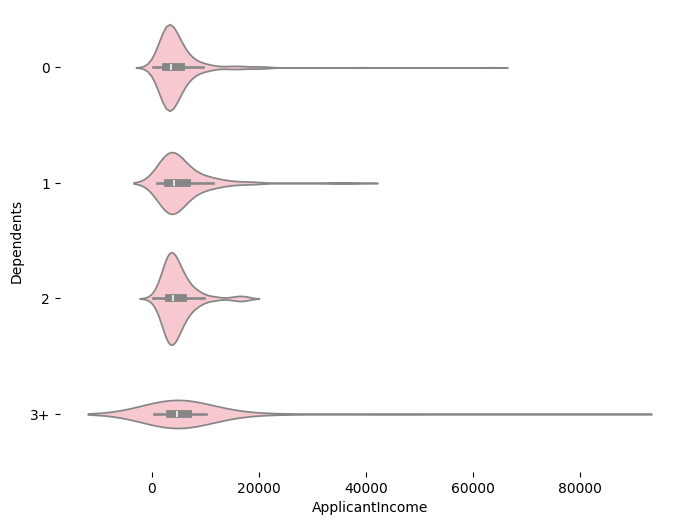

In [18]:
figsize = (8, 1.2 * len(loan['Dependents'].unique()))
plt.figure(figsize=figsize)
# PLot violin plots with inner Box Plots
sns.violinplot(loan, x='ApplicantIncome', y='Dependents', inner='box', color='pink')
sns.despine(top=True, right=True, bottom=True, left=True)

#### **2.d. Correlational analysis on the dataset (only on Numerical features)**

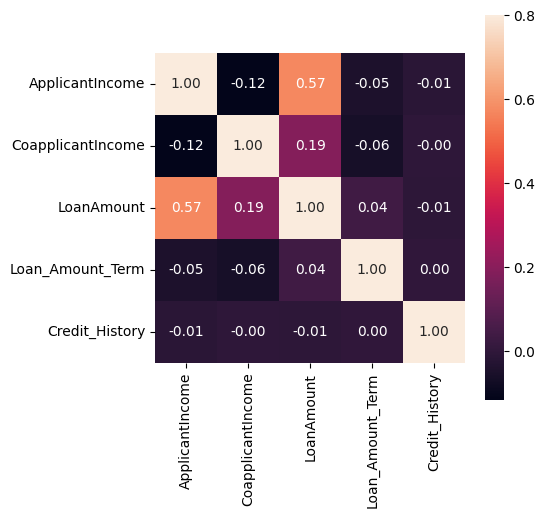

In [19]:
# Correlation Analysis displayed only for Numerical Features
# For entire dataset shown post Label Encoding of Categorical Features also
corrmat = loan.corr()
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.2f')
plt.show()

**Will this correlational analysis have effect on feature selection that you will perform in the next step?**

Post conversion of categorical features to numerical features, we generate a Correlation matrix of each feature against the target variable (Loan_Status). The resultant correlation matrix would be used to select the input features that have either high postive or high negative (inverse) correlation with the target variable.

Features found to have high correlation with the target class, from the above performed Correlation Analysis, would be selected in the further steps for model building and performance evaluation.

Features with low correlation would not be considered for further processing.

# 3. Data Pre-processing and cleaning

#### **Create a copy to retain original dataset**

In [20]:
dset = loan.copy()
dset.head(5) # Display top 5 rows

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
dset.shape

(614, 12)

In [22]:
dset.size

7368

In [23]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [24]:
dset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Identifying existance of duplicate samples**

In [25]:
dset[dset.duplicated()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


#### **3.a. Identifying Null/Missing Values**

In [26]:
dset.isnull().sum() # Computes sum of Null Values for each feature

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Fill missing values with mean of all samples for numerical data or minority class for categorical data**

In [27]:
# Fill features of float type with mean
dset['LoanAmount'].fillna(value=dset['LoanAmount'].mean(), inplace=True)
dset['Loan_Amount_Term'].fillna(value=dset['Loan_Amount_Term'].mean(), inplace=True)
dset['Credit_History'].fillna(value=dset['Credit_History'].mean(), inplace=True)

In [28]:
# Find the Minority classes for each categorical feature
for i in loan.columns: # Iterate over features of the dataset
  if loan[i].dtype == 'O': # If the feature is Categorical, continue
    print(i)
    print(loan[i].unique())
    print(Counter(loan[i]))

Gender
['Male' 'Female' nan]
Counter({'Male': 489, 'Female': 112, nan: 13})
Married
['No' 'Yes' nan]
Counter({'Yes': 398, 'No': 213, nan: 3})
Dependents
['0' '1' '2' '3+' nan]
Counter({'0': 345, '1': 102, '2': 101, '3+': 51, nan: 15})
Education
['Graduate' 'Not Graduate']
Counter({'Graduate': 480, 'Not Graduate': 134})
Self_Employed
['No' 'Yes' nan]
Counter({'No': 500, 'Yes': 82, nan: 32})
Property_Area
['Urban' 'Rural' 'Semiurban']
Counter({'Semiurban': 233, 'Urban': 202, 'Rural': 179})
Loan_Status
['Y' 'N']
Counter({'Y': 422, 'N': 192})


In [29]:
# Fill categorical features with minority class - since the dataset has class imbalance
dset['Gender'].fillna('Female', inplace=True)
dset['Married'].fillna('No', inplace=True)
dset['Dependents'].fillna('3+', inplace=True)
dset['Self_Employed'].fillna('Yes', inplace=True)

**Re-check on Null/Missing Values**

In [30]:
dset.isnull().sum() # No feature has null values now

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Convert categorical features to numerical for ease of analysis and modeling, using Label Encoding technique**

In [31]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [32]:
for i in dset.columns: # Iterate over features of the dataset
  if dset[i].dtype == 'O': # If the feature is Categorical, continue
    # print(i)
    col = str(i+'_Class')
    new_col = str(i+'_new_Class')
    temp = pd.DataFrame(dset[i].unique(), columns=[col])
    temp[new_col] = enc.fit_transform(temp[col])
    print(temp,"\n")
    dset[i] = enc.fit_transform(dset[i]) # encode the original dataset in alphabetical order

  Gender_Class  Gender_new_Class
0         Male                 1
1       Female                 0 

  Married_Class  Married_new_Class
0            No                  0
1           Yes                  1 

  Dependents_Class  Dependents_new_Class
0                0                     0
1                1                     1
2                2                     2
3               3+                     3 

  Education_Class  Education_new_Class
0        Graduate                    0
1    Not Graduate                    1 

  Self_Employed_Class  Self_Employed_new_Class
0                  No                        0
1                 Yes                        1 

  Property_Area_Class  Property_Area_new_Class
0               Urban                        2
1               Rural                        0
2           Semiurban                        1 

  Loan_Status_Class  Loan_Status_new_Class
0                 Y                      1
1                 N                      0 



**Sanity check on the converted features**

In [33]:
dset.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [34]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [35]:
dset.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.796417,0.648208,0.817590,0.218241,0.185668,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.402991,0.477919,1.060618,0.413389,0.389155,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


#### **Finding and Handling Outliers - Feature Engineering**

In [36]:
from scipy.stats import skew, kurtosis
def outlier_analysis(col_name):
  print(col_name.name)
  print("Skewness:",skew(col_name))
  print("Kurtosis:",kurtosis(col_name))
  outliers = []
  Q1 = col_name.quantile(0.25) # Compute the First Quartile
  Q3 = col_name.quantile(0.75) # Compute the Third Quartile
  IQR = Q3 - Q1 # Compute the Inter Quartile Range

  print("\nOutlier Analysis")
  if len(col_name.unique())<5:
    upper_limit = max(col_name) # Initial Categorical features like Gender
    lower_limit = min(col_name)
  else:
    upper_limit = Q3 + (1.5*IQR) # Compute limits for numerical features
    lower_limit = Q1 - (1.5*IQR)
  print("Upper Limit:", upper_limit)
  print("Lower Limit:", lower_limit)
  for out in col_name:
    if out>upper_limit or out<lower_limit:
      outliers.append(out)
  print("Current Outlier Count:",len(outliers))

  if not outliers:
    print("\nNo Outliers")
  else:
    print("\nReplace Outliers with Median") # Since Mean is greatly impacted by outliers and not a good metric to be replaced with; hence using Median Replacement
    median = col_name.median()
    col_name=np.where(col_name>upper_limit,median,np.where(col_name<lower_limit,median,col_name))

    outliers = [] # Outlier Check
    for out in col_name:
      if out>upper_limit or out<lower_limit:
        outliers.append(out)
    print("Updated Outlier Count:",len(outliers))

In [37]:
def plotchart(col_name):
    fig, (ax1,ax2) =plt.subplots(1,2,figsize=(10,4))
    sns.boxplot(col_name, orient='h',ax=ax1, color = 'orange',  palette= 'pastel')
    ax1.set_ylabel=col_name.name
    ax1.set_title('Box plot of {}'.format(col_name.name))
    sns.distplot(col_name,ax=ax2, color= 'red')
    ax2.set_title('Distribution plot of {}'.format(col_name.name))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

CoapplicantIncome
Skewness: 7.473216996340462
Kurtosis: 84.25637650578992

Outlier Analysis
Upper Limit: 5743.125
Lower Limit: -3445.875
Current Outlier Count: 18

Replace Outliers with Median
Updated Outlier Count: 0


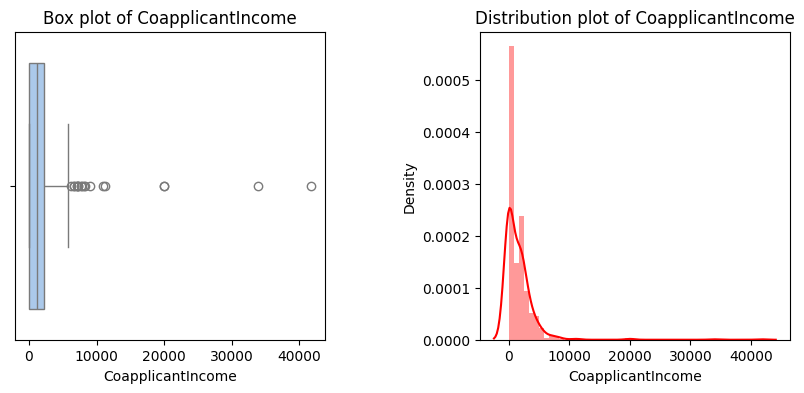

In [38]:
plotchart(dset.CoapplicantIncome)
outlier_analysis(dset.CoapplicantIncome)

#### **Outlier Analysis, Analysis on Skewness/Kurtosis and Visualization for all features**

Gender
Skewness: -1.4722852039877976
Kurtosis: 0.1676237218813914

Outlier Analysis
Upper Limit: 1
Lower Limit: 0
Current Outlier Count: 0

No Outliers


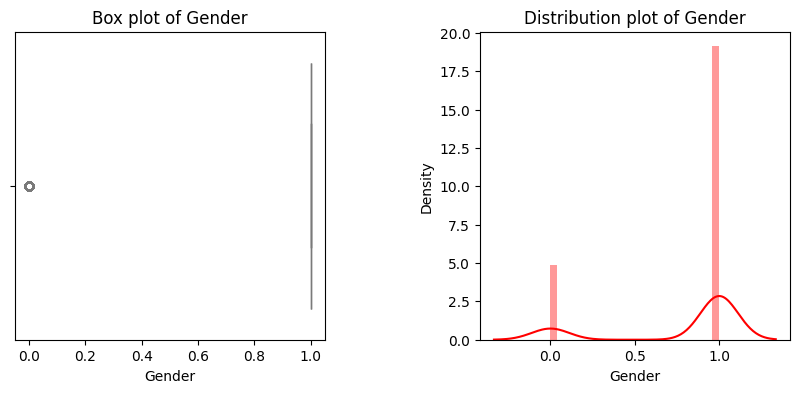

In [39]:
plotchart(dset.Gender)
outlier_analysis(dset.Gender)

Married
Skewness: -0.6207303443781269
Kurtosis: -1.6146938395682122

Outlier Analysis
Upper Limit: 1
Lower Limit: 0
Current Outlier Count: 0

No Outliers


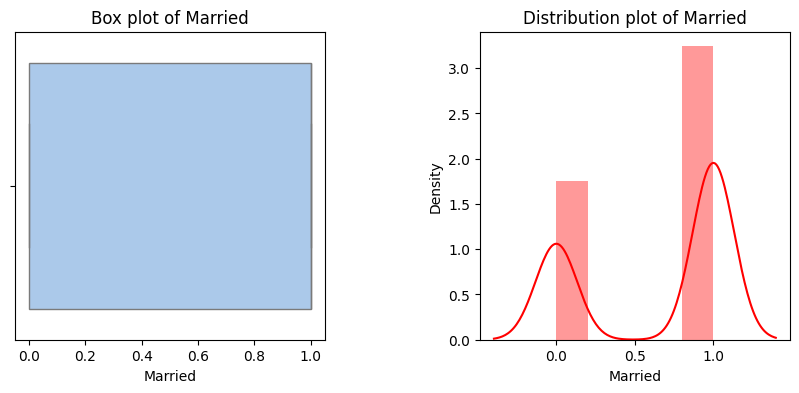

In [40]:
plotchart(dset.Married)
outlier_analysis(dset.Married)

Dependents
Skewness: 0.91010417701658
Kurtosis: -0.6125694956834056

Outlier Analysis
Upper Limit: 3
Lower Limit: 0
Current Outlier Count: 0

No Outliers


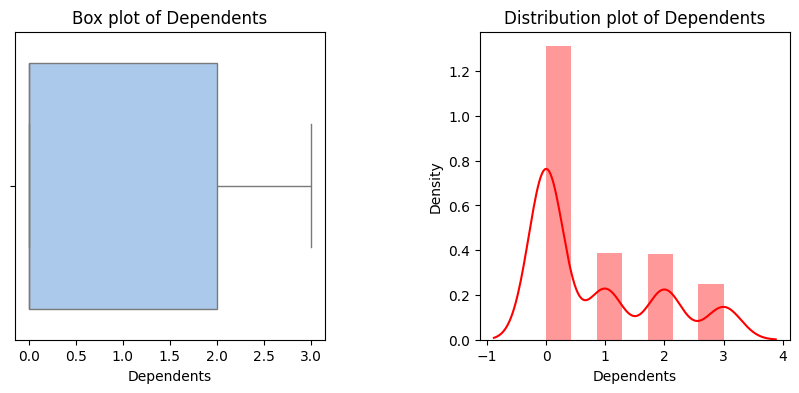

In [41]:
plotchart(dset.Dependents)
outlier_analysis(dset.Dependents)

Education
Skewness: 1.3642786441579564
Kurtosis: -0.13874378109452756

Outlier Analysis
Upper Limit: 1
Lower Limit: 0
Current Outlier Count: 0

No Outliers


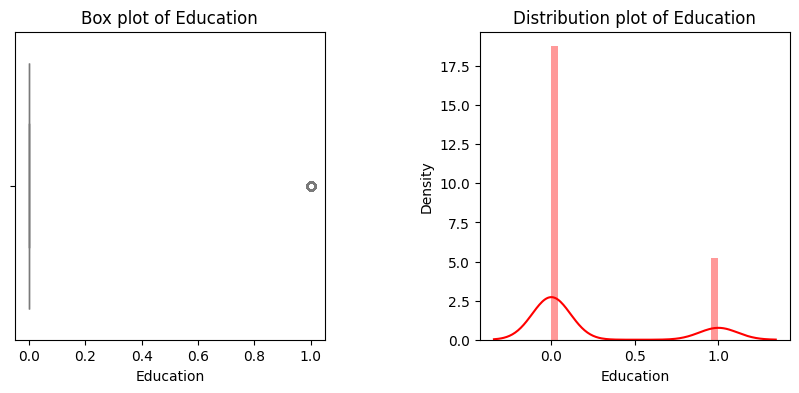

In [42]:
plotchart(dset.Education)
outlier_analysis(dset.Education)

Self_Employed
Skewness: 1.6167760860059441
Kurtosis: 0.6139649122807009

Outlier Analysis
Upper Limit: 1
Lower Limit: 0
Current Outlier Count: 0

No Outliers


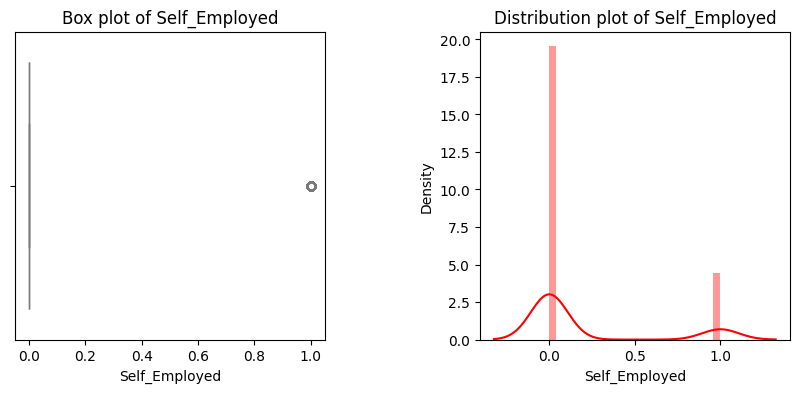

In [43]:
plotchart(dset.Self_Employed)
outlier_analysis(dset.Self_Employed)

ApplicantIncome
Skewness: 6.523526250899361
Kurtosis: 60.0390403937373

Outlier Analysis
Upper Limit: 10171.25
Lower Limit: -1498.75
Current Outlier Count: 50

Replace Outliers with Median
Updated Outlier Count: 0


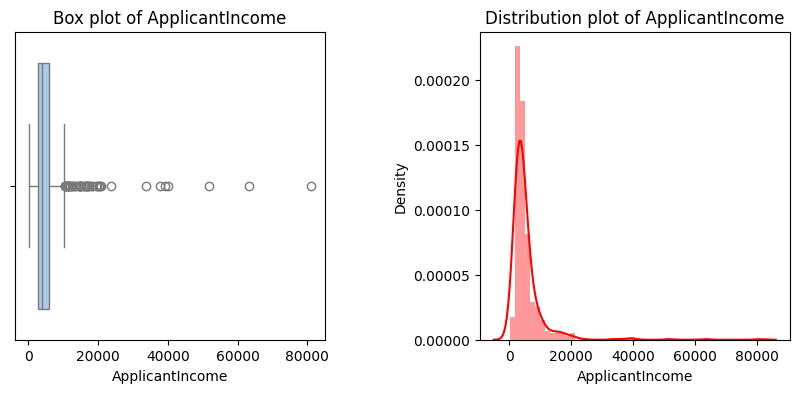

In [44]:
plotchart(dset.ApplicantIncome)
outlier_analysis(dset.ApplicantIncome)

CoapplicantIncome
Skewness: 7.473216996340462
Kurtosis: 84.25637650578992

Outlier Analysis
Upper Limit: 5743.125
Lower Limit: -3445.875
Current Outlier Count: 18

Replace Outliers with Median
Updated Outlier Count: 0


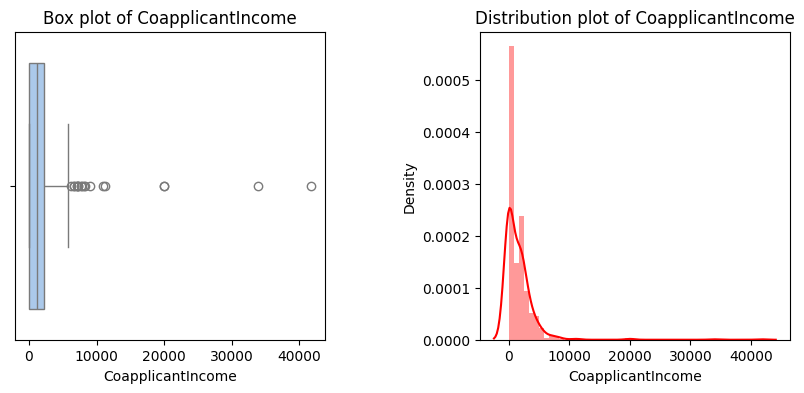

In [45]:
plotchart(dset.CoapplicantIncome)
outlier_analysis(dset.CoapplicantIncome)

LoanAmount
Skewness: 2.719935540956202
Kurtosis: 10.79816910045601

Outlier Analysis
Upper Limit: 261.5
Lower Limit: 3.5
Current Outlier Count: 41

Replace Outliers with Median
Updated Outlier Count: 0


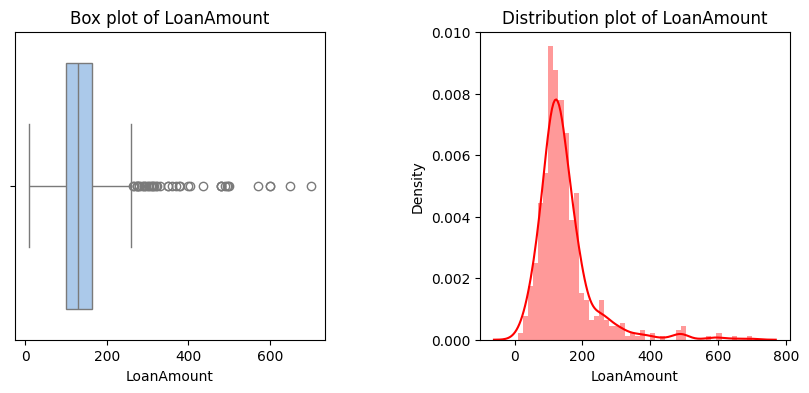

In [46]:
plotchart(dset.LoanAmount)
outlier_analysis(dset.LoanAmount)

Loan_Amount_Term
Skewness: -2.3838380001508668
Kurtosis: 6.832194504218922

Outlier Analysis
Upper Limit: 360.0
Lower Limit: 360.0
Current Outlier Count: 102

Replace Outliers with Median
Updated Outlier Count: 0


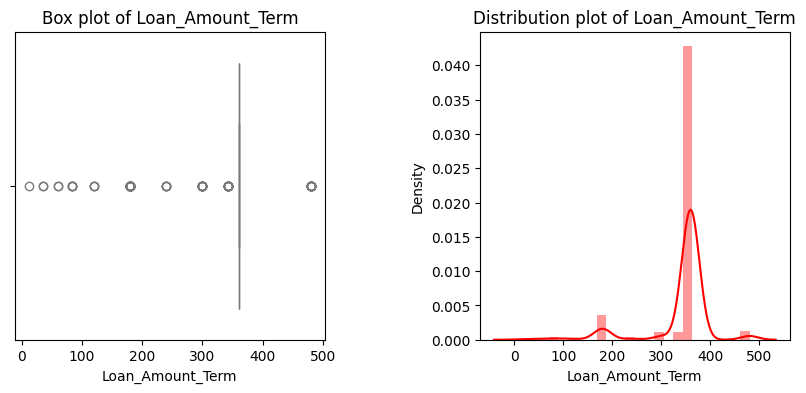

In [47]:
plotchart(dset.Loan_Amount_Term)
outlier_analysis(dset.Loan_Amount_Term)

Credit_History
Skewness: -1.9588001568214484
Kurtosis: 1.9255505366332386

Outlier Analysis
Upper Limit: 1.0
Lower Limit: 0.0
Current Outlier Count: 0

No Outliers


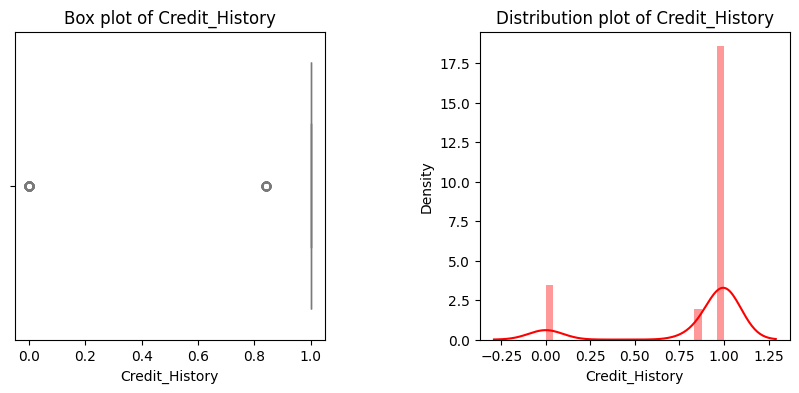

In [48]:
plotchart(dset.Credit_History)
outlier_analysis(dset.Credit_History)

Property_Area
Skewness: -0.06603431807343829
Kurtosis: -1.3821671652624052

Outlier Analysis
Upper Limit: 2
Lower Limit: 0
Current Outlier Count: 0

No Outliers


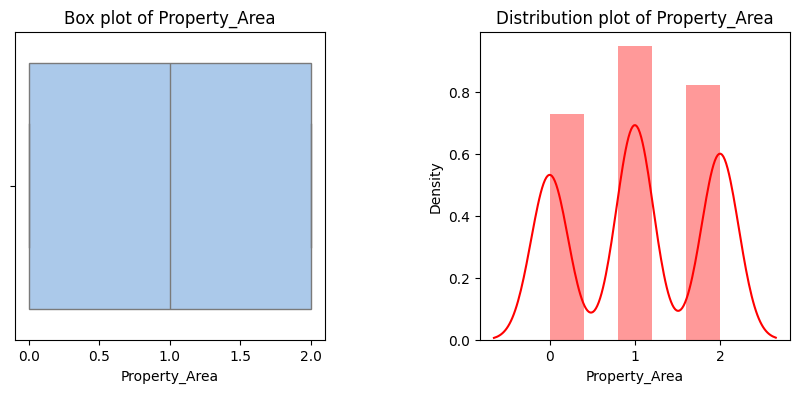

In [49]:
plotchart(dset.Property_Area)
outlier_analysis(dset.Property_Area)

#### **3.b. Some of the Feature Engineering Techniques - Standardization and Normalization**

In [50]:
from sklearn.preprocessing import StandardScaler, normalize

In [51]:
# Standardization
std_scalar = StandardScaler()
std_dset = std_scalar.fit_transform(dset)

In [52]:
std_dset # Standardized dataset

array([[ 0.50559245, -1.3574213 , -0.77149007, ...,  0.45164045,
         1.22329839,  0.67451931],
       [ 0.50559245,  0.73669096,  0.17212528, ...,  0.45164045,
        -1.31851281, -1.48253724],
       [ 0.50559245,  0.73669096, -0.77149007, ...,  0.45164045,
         1.22329839,  0.67451931],
       ...,
       [ 0.50559245,  0.73669096,  0.17212528, ...,  0.45164045,
         1.22329839,  0.67451931],
       [ 0.50559245,  0.73669096,  1.11574062, ...,  0.45164045,
         1.22329839,  0.67451931],
       [-1.97787765, -1.3574213 , -0.77149007, ..., -2.41044061,
        -0.04760721, -1.48253724]])

In [53]:
# Normalization
norm_dset = normalize(dset)
normalized_dset = pd.DataFrame(norm_dset,columns=dset.columns)

In [54]:
normalized_dset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.000171,0.000000,0.000000,0.000000,0.000000,0.997800,0.000000,0.024977,0.061414,0.000171,0.000341,0.000171
1,0.000207,0.000207,0.000207,0.000000,0.000000,0.946934,0.311581,0.026447,0.074383,0.000207,0.000000,0.000000
2,0.000331,0.000331,0.000000,0.000000,0.000331,0.992640,0.000000,0.021838,0.119117,0.000331,0.000662,0.000331
3,0.000284,0.000284,0.000000,0.000284,0.000000,0.734232,0.670274,0.034111,0.102332,0.000284,0.000569,0.000284
4,0.000166,0.000000,0.000000,0.000000,0.000000,0.997930,0.000000,0.023451,0.059876,0.000166,0.000333,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.992090,0.000000,0.024289,0.123156,0.000342,0.000000,0.000342
610,0.000243,0.000243,0.000730,0.000000,0.000000,0.998993,0.000000,0.009732,0.043794,0.000243,0.000000,0.000243
611,0.000124,0.000124,0.000124,0.000000,0.000000,0.998078,0.029675,0.031283,0.044513,0.000124,0.000247,0.000124
612,0.000132,0.000132,0.000263,0.000000,0.000000,0.998572,0.000000,0.024625,0.047407,0.000132,0.000263,0.000132


**Apply Box-Cox Transformation**

In [55]:
from scipy import stats

In [56]:
def box_cox_transformation(col_name):
  fitted_data,fitted_lambda = stats.boxcox(col_name[col_name>0]) # Apply transformation to non-zero values
  # Lambda is the transformation factor applied
  col_name_initial = col_name
  col_name[col_name == 0] = 1/fitted_lambda # Replace zero values with transformation values

  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
  sns.distplot(col_name_initial,ax=ax1, color= 'green')
  sns.distplot(fitted_data, ax=ax2, color= 'magenta')
  plt.subplots_adjust(wspace=0.5, hspace=0.5)
  print("Lambda value used for Transformation:",fitted_lambda)

Lambda value used for Transformation: -0.10070622927980624


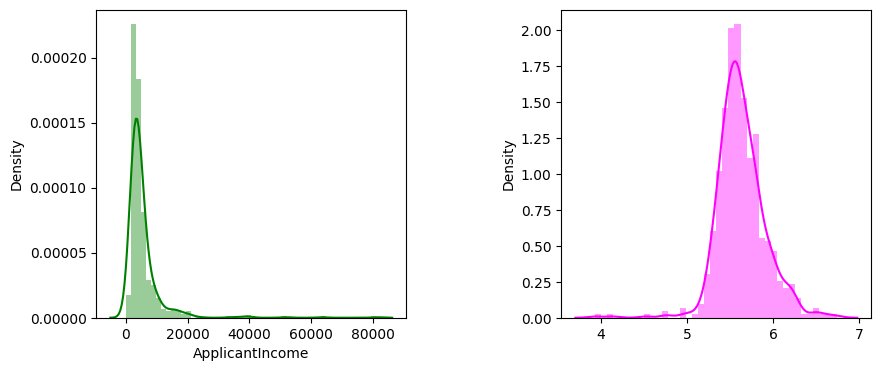

In [57]:
box_cox_transformation(dset.ApplicantIncome)

Lambda value used for Transformation: 0.09169835684540555


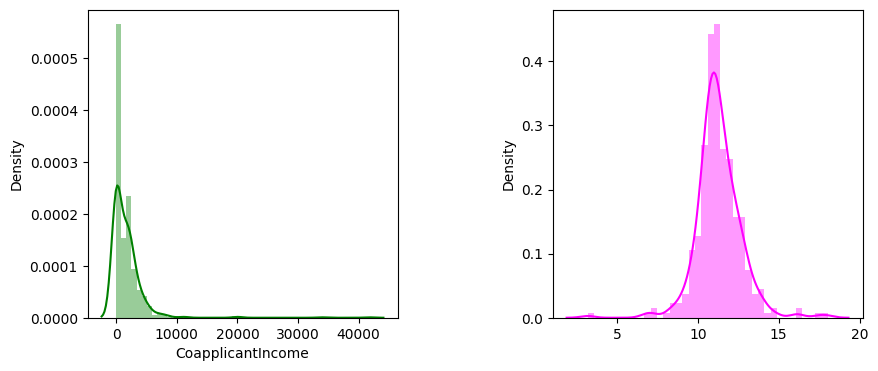

In [58]:
box_cox_transformation(dset.CoapplicantIncome)

Lambda value used for Transformation: 0.07426142220126615


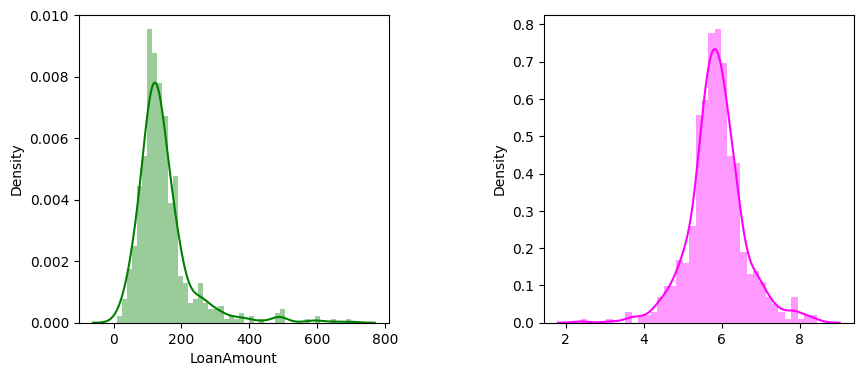

In [59]:
box_cox_transformation(dset.LoanAmount)

Box Cox Transformation is used here to transform numerical features into a Normal Distribution and improve performance of models that assume Normality and Homoscedasticity

# 4. Model Building

#### **Correlation Matrix to choose input features**

In [60]:
dset.corrwith(dset.Loan_Status)

Gender               0.025407
Married              0.084281
Dependents          -0.003391
Education           -0.085884
Self_Employed        0.005857
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059381
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
Credit_History       0.540483
Property_Area        0.032112
Loan_Status          1.000000
dtype: float64

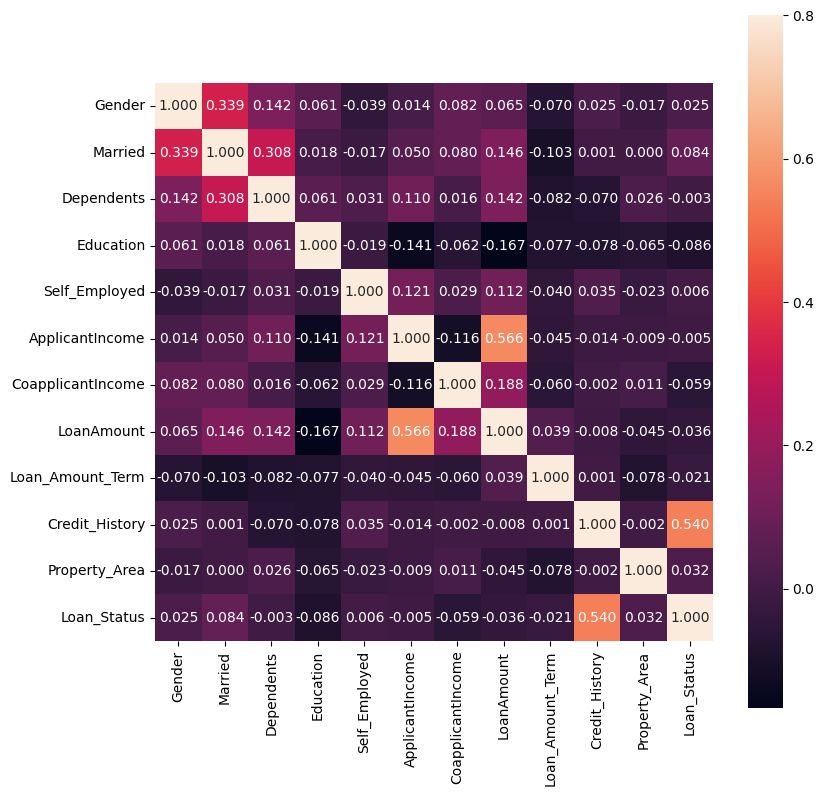

In [61]:
# Correlational analysis and visualization of entire the dataset
corrmat = dset.corr()
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.3f')
plt.show()

#### **Split independent and dependent (target) variables into X and y.**


Most features with both positive and negative high correlation have been considered.
Credit_History(0.54), Education(-0.086), Married(0.084), CoapplicantIncome(-0.059), LoanAmount(-0.036), Property_Area(0.032), Gender(0.025), Loan_Amount_Term(-0.021)

In [62]:
X = dset.loc[:,['Gender','Married', 'Education', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = dset['Loan_Status']

#### **4.a. Split the dataset into training and test sets**

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV

**4.a.i. Train = 80 % Test = 20%**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 8)
(123, 8)
(491,)
(123,)


#### **4.b. Build model using Logistic Model**

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

**Performance Evaluation for Logistic Regression**

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools

In [69]:
accuracy_score(y_test,y_predict)

0.7967479674796748

**With different train and test size**

**4.a.i. Train = 70 % Test = 30%**

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [71]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict) # improved accuracy with different test size

0.8

In [72]:
confusion_matrix(y_test,y_predict)

array([[ 16,  36],
       [  1, 132]])

In [73]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

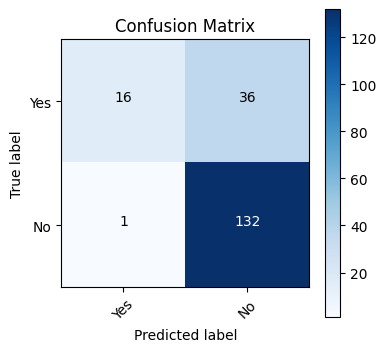

In [74]:
cm = confusion_matrix(y_test,y_predict)
cm_plot_labels = ['Yes', 'No']
plt.figure(figsize=(4,4))
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [75]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.31      0.46        52
           1       0.79      0.99      0.88       133

    accuracy                           0.80       185
   macro avg       0.86      0.65      0.67       185
weighted avg       0.83      0.80      0.76       185



#### **4.b. Build model using Decision Tree**

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
model = DecisionTreeClassifier(criterion='gini',max_depth=30,max_features=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6918918918918919

In [78]:
confusion_matrix(y_test,y_predict)

array([[ 16,  36],
       [  1, 132]])

In [79]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.31      0.46        52
           1       0.79      0.99      0.88       133

    accuracy                           0.80       185
   macro avg       0.86      0.65      0.67       185
weighted avg       0.83      0.80      0.76       185



#### **Use of SMOTE for Data Balancing**

In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'), y_train)

print('Original dataset', Counter(y_train))
print('Resample dataset', Counter(y_train_smote))

Original dataset Counter({1: 289, 0: 140})
Resample dataset Counter({0: 289, 1: 289})


In [81]:
model = LogisticRegression()
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7837837837837838

In [82]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.71      0.38      0.50        52
           1       0.80      0.94      0.86       133

    accuracy                           0.78       185
   macro avg       0.76      0.66      0.68       185
weighted avg       0.77      0.78      0.76       185



#### **Hyperparameter Tuning for Logistic Regression**



In [83]:
grid={"C":np.logspace(0.1,0.4,4), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(random_state=0, solver='liblinear')
logreg_cv=GridSearchCV(logreg,grid,cv=10, scoring = "accuracy", n_jobs =6,verbose = 1)
logreg_cv.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
tuned hyperparameters :(best parameters)  {'C': 1.2589254117941673, 'penalty': 'l1'}
accuracy : 0.8109634551495015


#### **Hyperparameter Tuning for Decision Tree**

In [84]:
model = DecisionTreeClassifier(criterion='gini',max_depth=40,max_features=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6918918918918919

In [85]:
model = DecisionTreeClassifier(criterion='gini',max_depth=20,max_features=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred) # Achieved highest accuracy with the hyperparameter tuning

0.6918918918918919

In [86]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=30,max_features=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6324324324324324

In [87]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=40,max_features=15)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.6810810810810811

#### **AUC ROC Curve**

In [88]:
from sklearn.metrics import roc_curve,roc_auc_score
nsprob = [0 for _ in range(len(y_test))]
dtprob = model.predict_proba(X_test)[:,1]
nsFP, nsTP, _ = roc_curve(y_test,nsprob)
dtFP, dtTP, _ = roc_curve(y_test,dtprob)
nsauc = roc_auc_score(y_test,nsprob)
dtauc = roc_auc_score(y_test,dtprob)
print("No Scale AUC ROC Score:",nsauc*100,"%")
print("Decision Tree AUC ROC Score:",dtauc*100,"%")

No Scale AUC ROC Score: 50.0 %
Decision Tree AUC ROC Score: 60.837189126662814 %


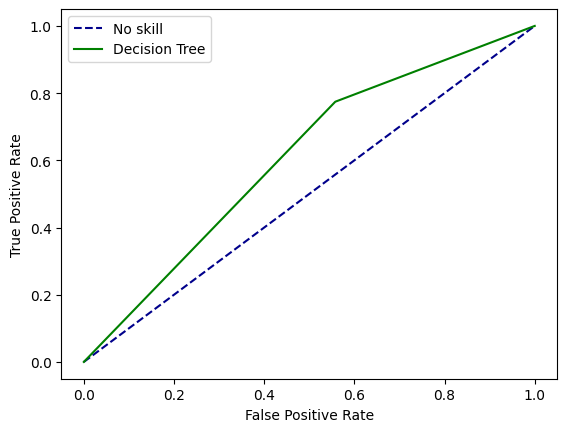

In [89]:
plt.plot(nsFP,nsTP,linestyle='--',color='darkblue',label="No skill")
plt.plot(dtFP,dtTP,linestyle='solid',color='green',label="Decision Tree")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [90]:
print("AUC Score:",(roc_auc_score(y_test,y_pred)*100),"%")

AUC Score: 60.837189126662814 %


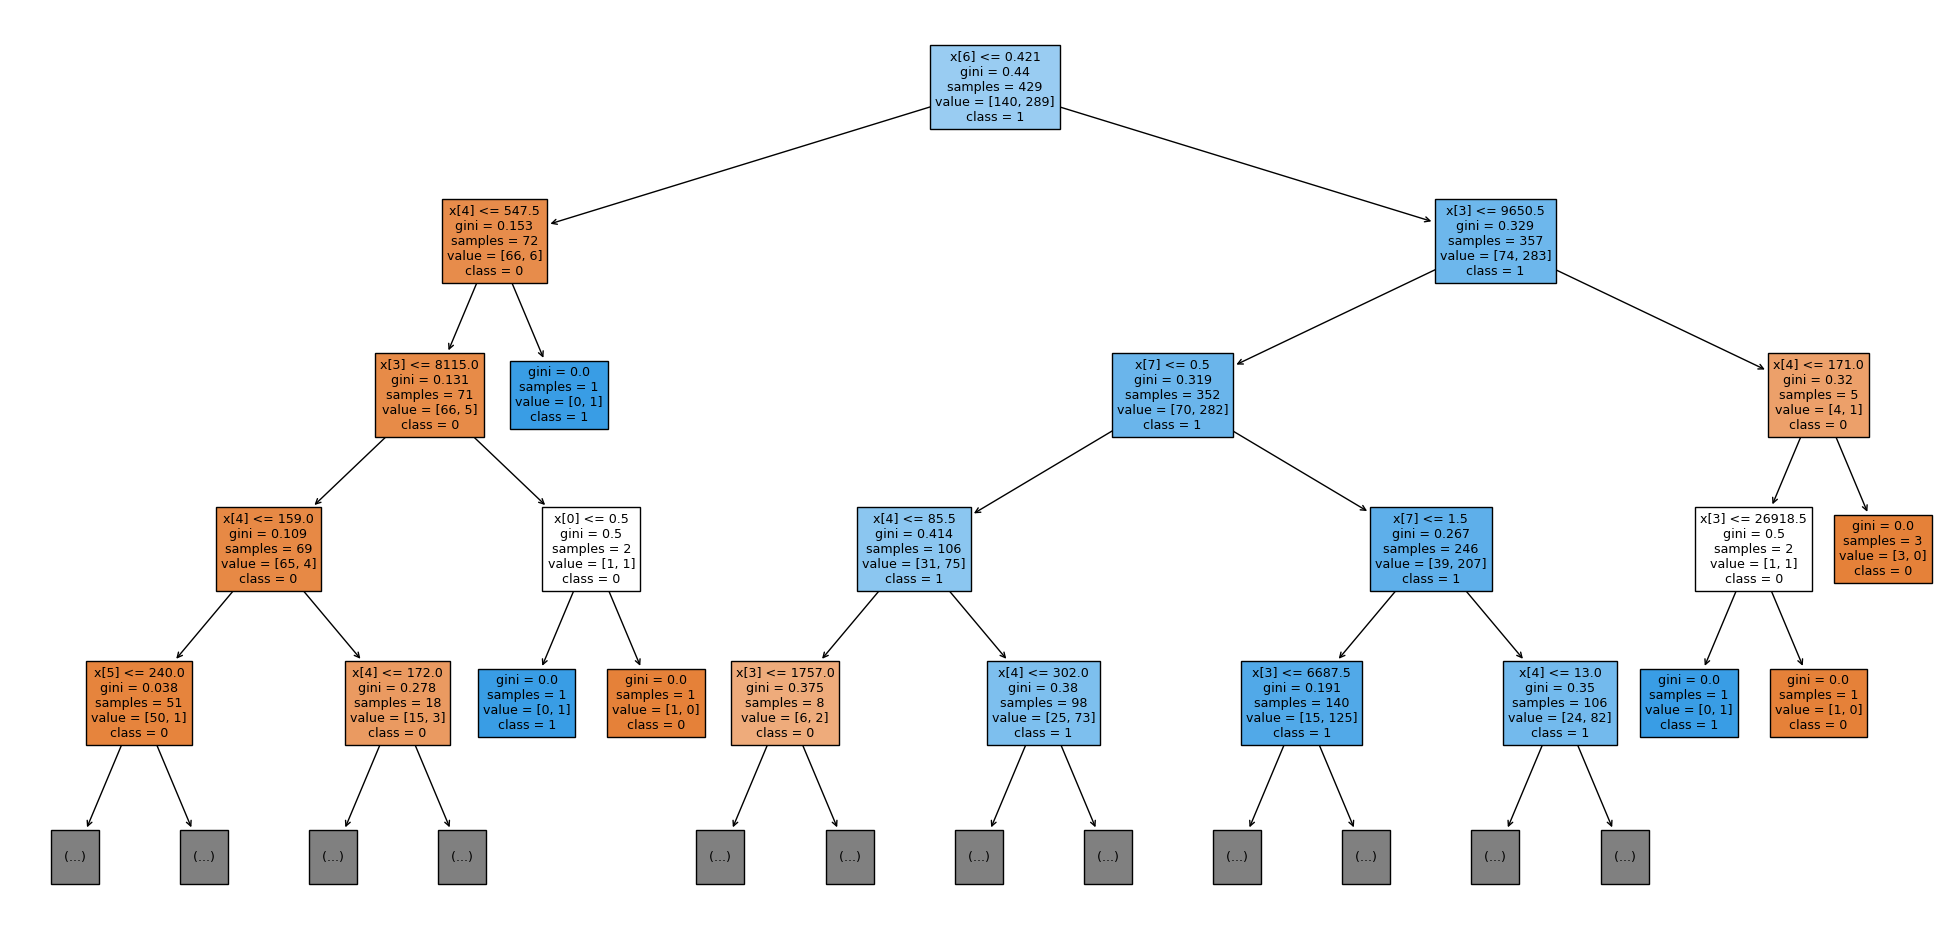

In [91]:
from sklearn import tree
from matplotlib import rcParams
rcParams['figure.figsize']=25,12
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
tree.plot_tree(model,class_names=["0","1"],filled=True,max_depth=4)
plt.show()

#### **4.b.i. Tune hyperparameters (e.g., number of trees, maximum depth) using crossvalidation. Justify your answer (K-Fold Cross Validation)**

In [92]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [93]:
models = []
models.append(('LR1',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LR2',LogisticRegression(solver='liblinear')))
models.append(('LR3',LogisticRegression()))
models.append(('DT1',DecisionTreeClassifier(criterion='gini')))
models.append(('DT2',DecisionTreeClassifier(criterion='gini',max_depth=40,max_features=5)))
models.append(('DT3',DecisionTreeClassifier(criterion='gini',max_depth=20,max_features=10)))
models.append(('DT4',DecisionTreeClassifier(criterion='entropy',max_depth=30,max_features=5)))
models.append(('DT5',DecisionTreeClassifier(criterion='entropy',max_depth=40,max_features=15)))

In [94]:
cvresults = []
names = []
res = []
for name, model in models:
    skf = StratifiedKFold(n_splits=10)
    cvres = cross_val_score(model,X_train,y_train,cv=skf,scoring='accuracy')
    cvresults.append(cvres)
    names.append(name)
    res.append(cvres.mean())
    print(name)
    print("Mean cross val res:",cvres.mean())

LR1
Mean cross val res: 0.8109634551495015
LR2
Mean cross val res: 0.8109634551495015
LR3
Mean cross val res: 0.8109634551495015
DT1
Mean cross val res: 0.7130675526024361
DT2
Mean cross val res: 0.715393133997785
DT3
Mean cross val res: 0.7106866002214838
DT4
Mean cross val res: 0.7152823920265781
DT5
Mean cross val res: 0.7247508305647841


From the above performance evaluation we can see that Logistic Regression models have better performance than Decision tree irrespective of Hyperparameter tuning.

# 5. Performance Evaluation Comparison

#### **5.a. Compare the performance of the Logistic Regression and Decision Tree models using appropriate evaluation metrics.**

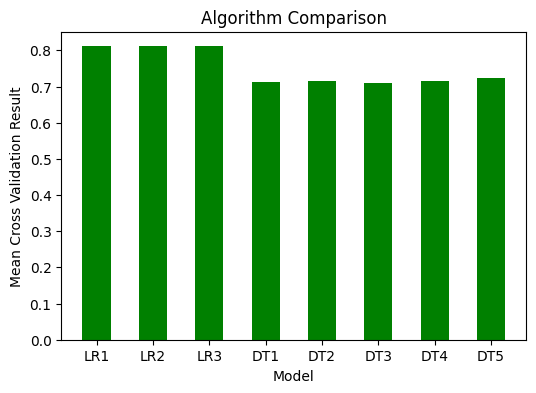

In [95]:
# Comparison using Cross Validation Results
plt.figure(figsize=(6,4))
plt.bar(names, res, color='green', width=0.5)
plt.xlabel('Model')
plt.ylabel('Mean Cross Validation Result')
plt.title('Algorithm Comparison')
plt.show()

**5.b. Provide insights into which model performs better and why.**

From the above plot we can see that Logistic regression performs well with a slightly higher accuracy score while compared to any hyperparameter values of Decision Tree. This is due to increased depth of the tree leading to overfitting (verification shown below), while Logistic regression maintains the Bias-Variance Tradeoff.

In [96]:
# Example consider DT3 with lowest performance
model = DecisionTreeClassifier(criterion='gini',max_depth=20,max_features=10)
model.fit(X_train,y_train)
print("Training Score:",model.score(X_train,y_train))

Training Score: 1.0


We can see a training score of 100% clearly indicating that the model has overfit the training samples, while poorly performing on the testing samples.

# **PART-II**

#### **1. Model Building**

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC

**K-Nearest Neighbours (K-NN)**

In [98]:
model = KNeighborsClassifier(n_neighbors=10,metric='minkowski')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.6972972972972973

<Axes: xlabel='Loan_Status', ylabel='Density'>

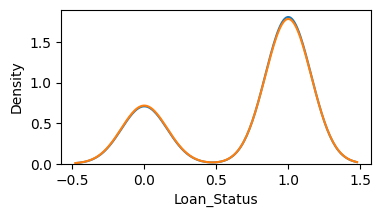

In [99]:
plt.figure(figsize=(4,2))
sns.distplot(y_test,hist=False,label='Actual Value')
sns.distplot(y_pred,hist=False,label='Predicted Value')

**Support Vector Machine (SVM)**

In [100]:
model = SVC(C=1.0,kernel='rbf',degree=3,gamma='auto')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7351351351351352

<Axes: xlabel='Loan_Status', ylabel='Density'>

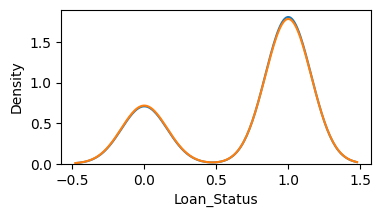

In [101]:
plt.figure(figsize=(4,2))
sns.distplot(y_test,hist=False,label='Actual Value')
sns.distplot(y_pred,hist=False,label='Predicted Value')

**Naive Bayesian (Benoulli Naive Bayes)**

In [102]:
model = BernoulliNB()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8

<Axes: xlabel='Loan_Status', ylabel='Density'>

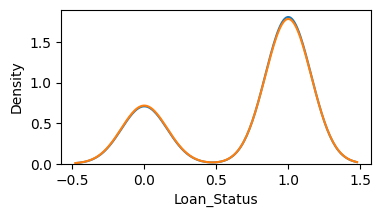

In [103]:
plt.figure(figsize=(4,2))
sns.distplot(y_test,hist=False,label='Actual Value')
sns.distplot(y_pred,hist=False,label='Predicted Value')

**Random Forest**

In [104]:
model = RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=None)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7297297297297297

<Axes: xlabel='Loan_Status', ylabel='Density'>

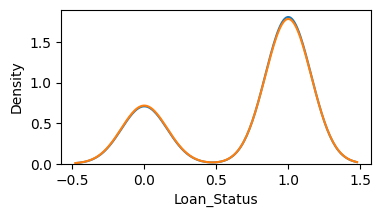

In [105]:
plt.figure(figsize=(4,2))
sns.distplot(y_test,hist=False,label='Actual Value')
sns.distplot(y_pred,hist=False,label='Predicted Value')

**AdaBoost**

In [106]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.7675675675675676

<Axes: xlabel='Loan_Status', ylabel='Density'>

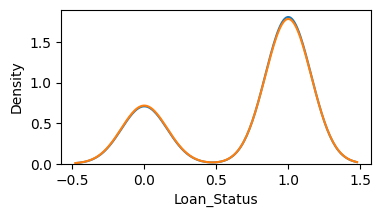

In [107]:
plt.figure(figsize=(4,2))
sns.distplot(y_test,hist=False,label='Actual Value')
sns.distplot(y_pred,hist=False,label='Predicted Value')

#### **2. Performance Evaluation**

**Prediction for Test data**

In [108]:
dset.tail(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,0,0,0,0,0,2900,10.905321,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,10.905321,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.000000,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,10.905321,187.0,360.0,1.0,2,1
613,0,0,0,0,1,4583,10.905321,133.0,360.0,0.0,1,0


In [109]:
model = KNeighborsClassifier(n_neighbors=10,metric='minkowski')
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

Perform Prediction for below inputs:
1. Gender = Male (1)
2. Married = Yes (1)
3. Education = Graduate (0)
4. CoapplicantIncome = 11
5. LoanAmount = 200
6. Loan_Amount_Term = 360
7. Credit_History = 1
8. Property_Area = Urban (2)

In [110]:
model.predict([[1,1,0,11,200,360,1,2]])

array([1])

Predicted Loan Status = 1 (Loan Approved)

**Calculate all the evaluation metrics**

In [111]:
def get_scores(model,Xtrain,Xtest,ytrain,ytest,train=True):
  if train:
    x,y = Xtrain,ytrain
  else:
    x,y = Xtest,ytest
  predictions = model.predict(x)
  score = accuracy_score(y,predictions)
  print("Accuracy Score:",score)
  print("Confusion Matrix:")
  print(confusion_matrix(y,predictions))
  print("\nClassification Report:",classification_report(y,predictions))
  return score

In [112]:
model = KNeighborsClassifier(n_neighbors=10,metric='minkowski')
model.fit(X_train,y_train)
print("Training Score:")
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
print("Testing Score:")
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)
KNN_Acc_Score = testing_score

Training Score:
Accuracy Score: 0.717948717948718
Confusion Matrix:
[[ 45  95]
 [ 26 263]]

Classification Report:               precision    recall  f1-score   support

           0       0.63      0.32      0.43       140
           1       0.73      0.91      0.81       289

    accuracy                           0.72       429
   macro avg       0.68      0.62      0.62       429
weighted avg       0.70      0.72      0.69       429

Testing Score:
Accuracy Score: 0.6972972972972973
Confusion Matrix:
[[ 10  42]
 [ 14 119]]

Classification Report:               precision    recall  f1-score   support

           0       0.42      0.19      0.26        52
           1       0.74      0.89      0.81       133

    accuracy                           0.70       185
   macro avg       0.58      0.54      0.54       185
weighted avg       0.65      0.70      0.66       185



In [113]:
results = pd.DataFrame(data=[['K-Nearest Neighbours',KNN_Acc_Score*100]],columns=['Model','Accuracy Score'])
results

,Model,Accuracy Score
0,K-Nearest Neighbours,69.72973


In [114]:
model = SVC(C=1.0,kernel='rbf',degree=3,gamma='auto')
model.fit(X_train,y_train)
print("Training Score:")
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
print("Testing Score:")
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)
SVC_Acc_Score = testing_score

Training Score:
Accuracy Score: 0.9230769230769231
Confusion Matrix:
[[107  33]
 [  0 289]]

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.76      0.87       140
           1       0.90      1.00      0.95       289

    accuracy                           0.92       429
   macro avg       0.95      0.88      0.91       429
weighted avg       0.93      0.92      0.92       429

Testing Score:
Accuracy Score: 0.7351351351351352
Confusion Matrix:
[[  3  49]
 [  0 133]]

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.06      0.11        52
           1       0.73      1.00      0.84       133

    accuracy                           0.74       185
   macro avg       0.87      0.53      0.48       185
weighted avg       0.81      0.74      0.64       185



In [115]:
df = pd.DataFrame(data=[['Support Vector Classifier',SVC_Acc_Score*100]],columns=['Model','Accuracy Score'])
results = results.append(df,ignore_index=True)
results

,Model,Accuracy Score
0,K-Nearest Neighbours,69.729730
1,Support Vector Classifier,73.513514


In [116]:
model = BernoulliNB()
model.fit(X_train,y_train)
print("Training Score:")
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
print("Testing Score:")
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)
BNB_Acc_Score = testing_score

Training Score:
Accuracy Score: 0.8135198135198135
Confusion Matrix:
[[ 66  74]
 [  6 283]]

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.47      0.62       140
           1       0.79      0.98      0.88       289

    accuracy                           0.81       429
   macro avg       0.85      0.73      0.75       429
weighted avg       0.83      0.81      0.79       429

Testing Score:
Accuracy Score: 0.8
Confusion Matrix:
[[ 16  36]
 [  1 132]]

Classification Report:               precision    recall  f1-score   support

           0       0.94      0.31      0.46        52
           1       0.79      0.99      0.88       133

    accuracy                           0.80       185
   macro avg       0.86      0.65      0.67       185
weighted avg       0.83      0.80      0.76       185



In [117]:
df = pd.DataFrame(data=[['Bernoulli Naive Bayes',BNB_Acc_Score*100]],columns=['Model','Accuracy Score'])
results = results.append(df,ignore_index=True)
results

,Model,Accuracy Score
0,K-Nearest Neighbours,69.729730
1,Support Vector Classifier,73.513514
2,Bernoulli Naive Bayes,80.000000


In [118]:
model = RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=None)
model.fit(X_train,y_train)
print("Training Score:")
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
print("Testing Score:")
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)
RFC_Acc_Score = testing_score

Training Score:
Accuracy Score: 1.0
Confusion Matrix:
[[140   0]
 [  0 289]]

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       289

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

Testing Score:
Accuracy Score: 0.7405405405405405
Confusion Matrix:
[[ 21  31]
 [ 17 116]]

Classification Report:               precision    recall  f1-score   support

           0       0.55      0.40      0.47        52
           1       0.79      0.87      0.83       133

    accuracy                           0.74       185
   macro avg       0.67      0.64      0.65       185
weighted avg       0.72      0.74      0.73       185



In [119]:
df = pd.DataFrame(data=[['Random Forest Classifier',RFC_Acc_Score*100]],columns=['Model','Accuracy Score'])
results = results.append(df,ignore_index=True)
results

,Model,Accuracy Score
0,K-Nearest Neighbours,69.729730
1,Support Vector Classifier,73.513514
2,Bernoulli Naive Bayes,80.000000
3,Random Forest Classifier,74.054054


In [120]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)
print("Training Score:")
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
print("Testing Score:")
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)
ABC_Acc_Score = testing_score

Training Score:
Accuracy Score: 0.8531468531468531
Confusion Matrix:
[[ 86  54]
 [  9 280]]

Classification Report:               precision    recall  f1-score   support

           0       0.91      0.61      0.73       140
           1       0.84      0.97      0.90       289

    accuracy                           0.85       429
   macro avg       0.87      0.79      0.82       429
weighted avg       0.86      0.85      0.84       429

Testing Score:
Accuracy Score: 0.7675675675675676
Confusion Matrix:
[[ 19  33]
 [ 10 123]]

Classification Report:               precision    recall  f1-score   support

           0       0.66      0.37      0.47        52
           1       0.79      0.92      0.85       133

    accuracy                           0.77       185
   macro avg       0.72      0.65      0.66       185
weighted avg       0.75      0.77      0.74       185



In [121]:
df = pd.DataFrame(data=[['AdaBoost Classifier',ABC_Acc_Score*100]],columns=['Model','Accuracy Score'])
results = results.append(df,ignore_index=True)
results

,Model,Accuracy Score
0,K-Nearest Neighbours,69.729730
1,Support Vector Classifier,73.513514
2,Bernoulli Naive Bayes,80.000000
3,Random Forest Classifier,74.054054
4,AdaBoost Classifier,76.756757


**Comment on the performance of these models**

From the above comparison of 5 models, we can see that Naive Bayes has the highest performance.

#### **3.Fine-Tuning Hyperparameters**

In [122]:
from sklearn.model_selection import RandomizedSearchCV
from random import randint

In [123]:
KNNparam = {'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

SVMparam = {'C':[1.0, 1.5, 2.0],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
            'degree': [3, 4, 5, 6],
            'gamma': ['scale', 'auto']}

BNBparam = {'alpha': [1.0, 1.1]}

RFCparam = {'max_depth': [6,9],
         'n_estimators':[50, 70, 100, 150],
          'max_features': [randint(1,6)],
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False]}

ABCparam = {'n_estimators': [40, 50, 60],
            'learning_rate': [1.0, 1.1],
            'algorithm': ['SAMME', 'SAMME.R']}

In [124]:
# KNN
model = RandomizedSearchCV(KNeighborsClassifier(),KNNparam,n_iter=10,cv=9)
model.fit(X_train,y_train)
print("Training Score:")
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
print("Testing Score:")
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)
KNN_Acc_Score = testing_score

Training Score:
Accuracy Score: 1.0
Confusion Matrix:
[[140   0]
 [  0 289]]

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       289

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

Testing Score:
Accuracy Score: 0.7243243243243244
Confusion Matrix:
[[ 11  41]
 [ 10 123]]

Classification Report:               precision    recall  f1-score   support

           0       0.52      0.21      0.30        52
           1       0.75      0.92      0.83       133

    accuracy                           0.72       185
   macro avg       0.64      0.57      0.56       185
weighted avg       0.69      0.72      0.68       185



In [125]:
results = pd.DataFrame(data=[['Randomized Search CV - KNN',KNN_Acc_Score*100]],columns=['Model','Accuracy Score'])
results

,Model,Accuracy Score
0,Randomized Search CV - KNN,72.432432


In [126]:
#BNB
model = RandomizedSearchCV(BernoulliNB(),BNBparam,n_iter=10,cv=9)
model.fit(X_train,y_train)
print("Training Score:")
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
print("Testing Score:")
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)
BNB_Acc_Score = testing_score

Training Score:
Accuracy Score: 0.8135198135198135
Confusion Matrix:
[[ 66  74]
 [  6 283]]

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.47      0.62       140
           1       0.79      0.98      0.88       289

    accuracy                           0.81       429
   macro avg       0.85      0.73      0.75       429
weighted avg       0.83      0.81      0.79       429

Testing Score:
Accuracy Score: 0.8
Confusion Matrix:
[[ 16  36]
 [  1 132]]

Classification Report:               precision    recall  f1-score   support

           0       0.94      0.31      0.46        52
           1       0.79      0.99      0.88       133

    accuracy                           0.80       185
   macro avg       0.86      0.65      0.67       185
weighted avg       0.83      0.80      0.76       185



In [127]:
df = pd.DataFrame(data=[['Randomized Search CV - BNB',BNB_Acc_Score*100]],columns=['Model','Accuracy Score'])
results = results.append(df,ignore_index=True)
results

,Model,Accuracy Score
0,Randomized Search CV - KNN,72.432432
1,Randomized Search CV - BNB,80.000000


In [128]:
#RFC
model = RandomizedSearchCV(RandomForestClassifier(),RFCparam,n_iter=10,cv=9)
model.fit(X_train,y_train)
print("Training Score:")
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
print("Testing Score:")
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)
RFC_Acc_Score = testing_score

Training Score:
Accuracy Score: 0.8368298368298368
Confusion Matrix:
[[ 73  67]
 [  3 286]]

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.52      0.68       140
           1       0.81      0.99      0.89       289

    accuracy                           0.84       429
   macro avg       0.89      0.76      0.78       429
weighted avg       0.86      0.84      0.82       429

Testing Score:
Accuracy Score: 0.8
Confusion Matrix:
[[ 17  35]
 [  2 131]]

Classification Report:               precision    recall  f1-score   support

           0       0.89      0.33      0.48        52
           1       0.79      0.98      0.88       133

    accuracy                           0.80       185
   macro avg       0.84      0.66      0.68       185
weighted avg       0.82      0.80      0.76       185



In [129]:
df = pd.DataFrame(data=[['Randomized Search CV - RFC',RFC_Acc_Score*100]],columns=['Model','Accuracy Score'])
results = results.append(df,ignore_index=True)
results

,Model,Accuracy Score
0,Randomized Search CV - KNN,72.432432
1,Randomized Search CV - BNB,80.000000
2,Randomized Search CV - RFC,80.000000


In [130]:
#ABC
model = RandomizedSearchCV(AdaBoostClassifier(),ABCparam,n_iter=10,cv=9)
model.fit(X_train,y_train)
print("Training Score:")
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
print("Testing Score:")
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)
ABC_Acc_Score = testing_score

Training Score:
Accuracy Score: 0.8275058275058275
Confusion Matrix:
[[ 71  69]
 [  5 284]]

Classification Report:               precision    recall  f1-score   support

           0       0.93      0.51      0.66       140
           1       0.80      0.98      0.88       289

    accuracy                           0.83       429
   macro avg       0.87      0.74      0.77       429
weighted avg       0.85      0.83      0.81       429

Testing Score:
Accuracy Score: 0.8
Confusion Matrix:
[[ 18  34]
 [  3 130]]

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.35      0.49        52
           1       0.79      0.98      0.88       133

    accuracy                           0.80       185
   macro avg       0.82      0.66      0.68       185
weighted avg       0.81      0.80      0.77       185



In [131]:
df = pd.DataFrame(data=[['Randomized Search CV - ABC',ABC_Acc_Score*100]],columns=['Model','Accuracy Score'])
results = results.append(df,ignore_index=True)
results

,Model,Accuracy Score
0,Randomized Search CV - KNN,72.432432
1,Randomized Search CV - BNB,80.000000
2,Randomized Search CV - RFC,80.000000
3,Randomized Search CV - ABC,80.000000


In [1]:
# SVM/SVC
model = RandomizedSearchCV(SVC(),SVMparam,n_iter=10,cv=9)
model.fit(X_train,y_train)
print("Training Score:")
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
print("Testing Score:")
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)
SVC_Acc_Score = testing_score

In [132]:
df = pd.DataFrame(data=[['Randomized Search CV - SVC',SVC_Acc_Score*100]],columns=['Model','Accuracy Score'])
results = results.append(df,ignore_index=True)
results

,Model,Accuracy Score
0,Randomized Search CV - KNN,72.432432
1,Randomized Search CV - BNB,80.000000
2,Randomized Search CV - RFC,80.000000
3,Randomized Search CV - ABC,80.000000
4,Randomized Search CV - SVC,73.513514


Using Randomized Search we can see that Bernoulli Naive Bayes and AdaBoost Classifier (increased performance parameter to 80%) can provide the best performing models with optimal combination of hyperparameters.

#### **4. Performance Evaluation post Hyperparameter Tuning and applying Randomized search**

Classification reports of each model (Precision, Recall, F1-Score and Accuracy) shown in the previous step

In [133]:
results.insert(2, "Misclassification Rate",[(1-KNN_Acc_Score)*100, (1-BNB_Acc_Score)*100, (1-RFC_Acc_Score)*100, (1-ABC_Acc_Score)*100, (1-SVC_Acc_Score)*100])
results

,Model,Accuracy Score,Misclassification Rate
0,Randomized Search CV - KNN,72.432432,27.567568
1,Randomized Search CV - BNB,80.000000,20.000000
2,Randomized Search CV - RFC,80.000000,20.000000
3,Randomized Search CV - ABC,80.000000,20.000000
4,Randomized Search CV - SVC,73.513514,26.486486


#### **5. Comparison and Analysis**

In [134]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=10,metric='minkowski')))
models.append(('SVM',SVC(C=1.0,kernel='rbf',degree=3,gamma='auto')))
models.append(('BNB',BernoulliNB()))
models.append(('GNB',GaussianNB()))
models.append(('RF',RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=None)))
models.append(('ABC',AdaBoostClassifier()))

In [135]:
cvresults = []
names = []
res = []
for name, model in models:
    skf = StratifiedKFold(n_splits=10)
    cvres = cross_val_score(model,X_train,y_train,cv=skf,scoring='accuracy')
    cvresults.append(cvres)
    names.append(name)
    res.append(cvres.mean())
    print(name)
    print("Mean cross val res:",cvres.mean())

KNN
Mean cross val res: 0.6478959025470653
SVM
Mean cross val res: 0.6573089700996679
BNB
Mean cross val res: 0.8133444075304539
GNB
Mean cross val res: 0.8017165005537098
RF
Mean cross val res: 0.7712624584717609
ABC
Mean cross val res: 0.7877076411960133


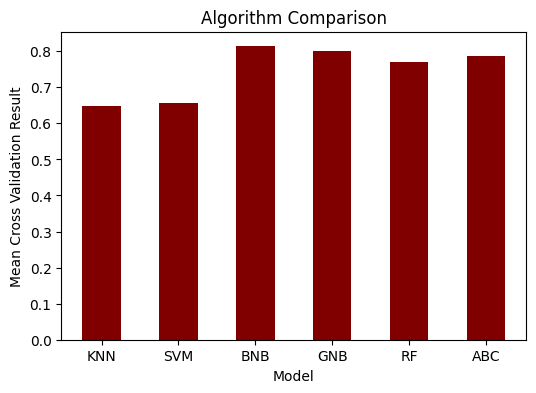

In [136]:
plt.figure(figsize=(6,4))
plt.bar(names, res, color='maroon', width=0.5)
plt.xlabel('Model')
plt.ylabel('Mean Cross Validation Result')
plt.title('Algorithm Comparison')
plt.show()

**Recommendation:** Bernoulli Naive Bayes Model works well with the Loan Sanction Dataset with the highest performance score.

# END